<a href="https://colab.research.google.com/github/aulialigar/computer-vision/blob/main/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive/')

os.chdir('/content/drive/My Drive/TKC')
!ls -a

Mounted at /content/drive/
 1   2	 3  'archive (31).zip'


In [ ]:
base_dir = '/content/drive/My Drive/TKC'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split=0.1)
 
validation_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split=0.1)

In [ ]:
# persiapan data training
train_generator = train_datagen.flow_from_directory(
        base_dir,  
        # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        target_size=(150, 150),  
        shuffle = True,
        subset='training',
        class_mode='categorical')

# persiapan data validasi
validation_generator = validation_datagen.flow_from_directory(
        base_dir, 
        # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        target_size=(150, 150),  
        subset='validation',
        class_mode='categorical')

Found 2768 images belonging to 3 classes.
Found 305 images belonging to 3 classes.


<h3>Definisikan Model</h3>

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

In [ ]:
# Tampilkan model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 36, 36, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       7

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
# latih model dengan model.fit 
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=150, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/150
25/25 - 188s - loss: 1.1054 - acc: 0.4250 - val_loss: 1.0346 - val_acc: 0.4187 - 188s/epoch - 8s/step
Epoch 2/150
25/25 - 121s - loss: 0.8930 - acc: 0.5863 - val_loss: 0.5994 - val_acc: 0.8000 - 121s/epoch - 5s/step
Epoch 3/150
25/25 - 83s - loss: 0.7584 - acc: 0.6480 - val_loss: 0.5687 - val_acc: 0.7688 - 83s/epoch - 3s/step
Epoch 4/150
25/25 - 66s - loss: 0.6216 - acc: 0.7372 - val_loss: 0.5215 - val_acc: 0.8125 - 66s/epoch - 3s/step
Epoch 5/150
25/25 - 53s - loss: 0.5858 - acc: 0.7275 - val_loss: 0.5420 - val_acc: 0.7812 - 53s/epoch - 2s/step
Epoch 6/150
25/25 - 44s - loss: 0.5533 - acc: 0.7613 - val_loss: 0.5886 - val_acc: 0.8125 - 44s/epoch - 2s/step
Epoch 7/150
25/25 - 35s - loss: 0.5234 - acc: 0.7825 - val_loss: 0.4779 - val_acc: 0.8000 - 35s/epoch - 1s/step
Epoch 8/150
25/25 - 29s - loss: 0.5404 - acc: 0.7602 - val_loss: 0.5628 - val_acc: 0.7125 - 29s/epoch - 1s/step
Epoch 9/150
25/25 - 25s - loss: 0.4918 - acc: 0.7887 - val_loss: 0.4656 - val_acc: 0.7812 - 25s/epoc

<h3>Evaluasi Model</h3>

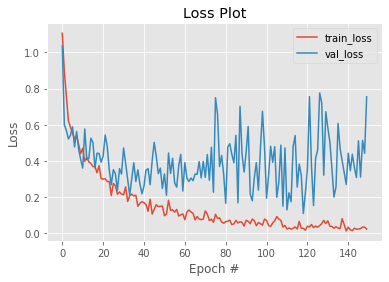

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 150), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 150), history.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

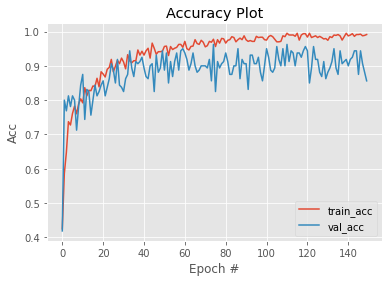

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 150), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, 150), history.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
# from sklearn.metrics import classification_report

# pred = model.predict(validation_generator)
# labels = (pred > 0.5).astype(np.int)

# print(classification_report(validation_generator.classes, labels))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
def evaluate(model):

  validation_generator = validation_datagen.flow_from_directory(
          base_dir, 
          target_size=(150,150), 
          batch_size=32, 
          class_mode='categorical',
          shuffle = False,
          subset='validation')

  batch_size = 32
  num_of_test_samples = len(validation_generator.filenames)

  Y_pred = model.predict_generator(validation_generator, num_of_test_samples // batch_size+1)
  y_pred = np.argmax(Y_pred, axis=1)

  print('\nConfusion Matrix\n')
  print(confusion_matrix(validation_generator.classes, y_pred))


  print('\n\nClassification Report\n')
  target_names = ['1', '2', '3']
  print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

In [ ]:
evaluate(model)

Found 305 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  



Confusion Matrix

[[ 60   5   5]
 [ 17 124   1]
 [  2   2  89]]


Classification Report

              precision    recall  f1-score   support

           1       0.76      0.86      0.81        70
           2       0.95      0.87      0.91       142
           3       0.94      0.96      0.95        93

    accuracy                           0.90       305
   macro avg       0.88      0.90      0.89       305
weighted avg       0.90      0.90      0.90       305

